#### 1. Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#### 2. Load Data

In [3]:
df = pd.read_csv('Match_dataset.csv')
result = pd.read_csv('match_results.csv')

print(f'Match Data: {df.shape}')
print(f'Result Data: {result.shape}')


Match Data: (600, 21)
Result Data: (600, 2)


In [4]:
df.head()

,Match_ID,Date,Venue,Team_A,Team_B,Stage,Team_A_Ranking,Team_B_Ranking,Team_A_Form,Team_B_Form,...,HeadToHead_B_Wins,Venue_HomeAdvantage_A,Venue_HomeAdvantage_B,Pitch_Type,Avg_T20_Score_Venue,Toss_Winner,Toss_Decision,Team_A_Tech_Index,Team_B_Tech_Index,Match_Total
0,M0001,2026-03-06,Chennai,New Zealand,Scotland,Super8,5,13,76.97,54.62,...,4,0,0,Spin-Friendly,155,Team_A,Field,251.27,156.37,168
1,M0002,2026-03-07,Mumbai,South Africa,Sri Lanka,Final,6,9,64.19,58.75,...,6,0,0,Flat,175,Team_B,Bat,249.33,187.44,150
2,M0003,2026-03-02,Kolkata,India,PNG,Group,1,20,69.87,45.14,...,0,1,0,Spin-Friendly,165,Team_B,Field,298.24,54.03,160
3,M0004,2026-02-22,Colombo,Netherlands,Ireland,Group,11,12,85.59,61.94,...,4,0,0,Spin-Friendly,160,Team_A,Bat,197.19,174.95,145
4,M0005,2026-02-28,Mumbai,Namibia,South Africa,Group,15,6,45.98,88.52,...,15,0,0,Flat,175,Team_B,Bat,124.91,271.68,185


In [5]:
result.head()

,Match_ID,Winner
0,M0001,Team_A
1,M0002,Team_A
2,M0003,Team_A
3,M0004,Team_A
4,M0005,Team_B


In [6]:
df.shape

(600, 21)

#### 3. Explore Data

In [7]:
# Merge data with result
full_data = df.merge(result, on='Match_ID')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Match_ID               600 non-null    object 
 1   Date                   600 non-null    object 
 2   Venue                  600 non-null    object 
 3   Team_A                 600 non-null    object 
 4   Team_B                 600 non-null    object 
 5   Stage                  600 non-null    object 
 6   Team_A_Ranking         600 non-null    int64  
 7   Team_B_Ranking         600 non-null    int64  
 8   Team_A_Form            600 non-null    float64
 9   Team_B_Form            600 non-null    float64
 10  HeadToHead_A_Wins      600 non-null    int64  
 11  HeadToHead_B_Wins      600 non-null    int64  
 12  Venue_HomeAdvantage_A  600 non-null    int64  
 13  Venue_HomeAdvantage_B  600 non-null    int64  
 14  Pitch_Type             600 non-null    object 
 15  Avg_T2

In [8]:
df.describe()

,Team_A_Ranking,Team_B_Ranking,Team_A_Form,Team_B_Form,HeadToHead_A_Wins,HeadToHead_B_Wins,Venue_HomeAdvantage_A,Venue_HomeAdvantage_B,Avg_T20_Score_Venue,Team_A_Tech_Index,Team_B_Tech_Index,Match_Total
count,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,10.580000,10.365000,61.17865,61.038950,7.768333,7.858333,0.071667,0.041667,166.781667,190.102250,191.911167,167.296667
std,5.821519,5.720108,15.70957,15.172641,6.186149,6.155058,0.258150,0.199993,8.066750,75.612595,74.113008,24.866562
min,1.000000,1.000000,14.71000,13.280000,0.000000,0.000000,0.000000,0.000000,155.000000,47.880000,41.050000,103.000000
25%,6.000000,5.000000,49.92000,51.015000,2.000000,3.000000,0.000000,0.000000,160.000000,123.220000,130.115000,150.750000
50%,11.000000,10.000000,60.89000,61.080000,7.000000,7.000000,0.000000,0.000000,165.000000,191.230000,191.930000,167.000000
75%,16.000000,15.000000,72.83250,71.350000,12.000000,12.000000,0.000000,0.000000,175.000000,251.585000,259.805000,184.250000
max,20.000000,20.000000,95.00000,95.000000,27.000000,29.000000,1.000000,1.000000,180.000000,339.540000,344.430000,243.000000


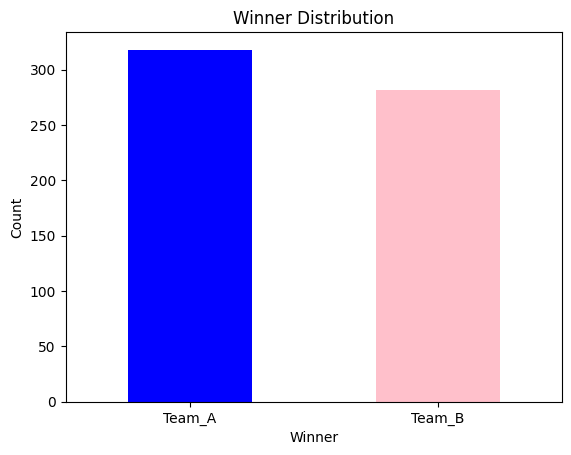

In [15]:
# Winner distribution
full_data['Winner'].value_counts().plot(kind='bar',color =['blue','pink'])
plt.title('Winner Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()